In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/paro.csv', sep=';')
df

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2023T4,"11,76"
1,Ambos sexos,Total Nacional,Total,2023T3,"11,84"
2,Ambos sexos,Total Nacional,Total,2023T2,"11,60"
3,Ambos sexos,Total Nacional,Total,2023T1,"13,26"
4,Ambos sexos,Total Nacional,Total,2022T4,"12,87"
...,...,...,...,...,...
36955,Mujeres,19 Melilla,55 y más años,2003T1,"0,00"
36956,Mujeres,19 Melilla,55 y más años,2002T4,"0,00"
36957,Mujeres,19 Melilla,55 y más años,2002T3,"0,00"
36958,Mujeres,19 Melilla,55 y más años,2002T2,"0,00"


In [3]:
df2 = pd.read_csv('../data/actividad_paro_empleo(poblacionenviviendasfamiliares).csv', sep=';')
df2

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T4,"58,99"
1,Ambos sexos,Total Nacional,Tasa de actividad,2023T3,"59,41"
2,Ambos sexos,Total Nacional,Tasa de actividad,2023T2,"58,97"
3,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,"58,55"
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,"58,52"
...,...,...,...,...,...
41971,Mujeres,52 Melilla,Tasa de empleo de la población,2003T1,"30,09"
41972,Mujeres,52 Melilla,Tasa de empleo de la población,2002T4,"29,64"
41973,Mujeres,52 Melilla,Tasa de empleo de la población,2002T3,"31,53"
41974,Mujeres,52 Melilla,Tasa de empleo de la población,2002T2,"30,03"


In [4]:
df2['Total'].value_counts()

Total
55,77    24
47,97    23
58,91    22
50,51    21
57,17    21
         ..
23,08     1
28,87     1
70,32     1
70,16     1
27,13     1
Name: count, Length: 6981, dtype: int64

In [5]:
df2['Total'] = df2['Total'].str.replace(',,','.')

In [6]:
df2 = df2.drop(27894)

In [7]:
df2['Total'] = df2['Total'].str.replace(',','.')

In [8]:
df2['Total'] = df2['Total'].str.replace('..','.')

In [9]:
df2['Total'] = df2['Total'].astype(float)
df2

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T4,58.99
1,Ambos sexos,Total Nacional,Tasa de actividad,2023T3,59.41
2,Ambos sexos,Total Nacional,Tasa de actividad,2023T2,58.97
3,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,58.55
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,58.52
...,...,...,...,...,...
41971,Mujeres,52 Melilla,Tasa de empleo de la población,2003T1,30.09
41972,Mujeres,52 Melilla,Tasa de empleo de la población,2002T4,29.64
41973,Mujeres,52 Melilla,Tasa de empleo de la población,2002T3,31.53
41974,Mujeres,52 Melilla,Tasa de empleo de la población,2002T2,30.03


In [10]:
df2['Periodo'] = df2['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')

In [18]:
df2['Periodo'] = pd.to_datetime(df2['Periodo'], format='%Y-%m-%d')

In [12]:
df2['Tasas'].unique()

array(['Tasa de actividad', 'Tasa de paro de la población',
       'Tasa de empleo de la población'], dtype=object)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41975 entries, 0 to 41975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sexo        41975 non-null  object        
 1   Provincias  41975 non-null  object        
 2   Tasas       41975 non-null  object        
 3   Periodo     41975 non-null  datetime64[ns]
 4   Total       41975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ MB


In [14]:
aa = df2[df2['Sexo']=='Ambos sexos']

In [15]:
aa.Tasas.value_counts()

Tasas
Tasa de actividad                 4664
Tasa de paro de la población      4664
Tasa de empleo de la población    4664
Name: count, dtype: int64

In [23]:
act = aa[aa['Tasas']=='Tasa de actividad']
paro = aa[aa['Tasas']=='Tasa de paro de la población']
empl = aa[aa['Tasas']=='Tasa de empleo de la población']

In [25]:
act.Provincias.unique()

array(['Total Nacional', '02 Albacete', '03 Alicante/Alacant',
       '04 Almería', '01 Araba/Álava', '33 Asturias', '05 Ávila',
       '06 Badajoz', '07 Balears, Illes', '08 Barcelona', '48 Bizkaia',
       '09 Burgos', '10 Cáceres', '11 Cádiz', '39 Cantabria',
       '12 Castellón/Castelló', '13 Ciudad Real', '14 Córdoba',
       '15 Coruña, A', '16 Cuenca', '20 Gipuzkoa', '17 Girona',
       '18 Granada', '19 Guadalajara', '21 Huelva', '22 Huesca',
       '23 Jaén', '24 León', '25 Lleida', '27 Lugo', '28 Madrid',
       '29 Málaga', '30 Murcia', '31 Navarra', '32 Ourense',
       '34 Palencia', '35 Palmas, Las', '36 Pontevedra', '26 Rioja, La',
       '37 Salamanca', '38 Santa Cruz de Tenerife', '40 Segovia',
       '41 Sevilla', '42 Soria', '43 Tarragona', '44 Teruel', '45 Toledo',
       '46 Valencia/València', '47 Valladolid', '49 Zamora',
       '50 Zaragoza', '51 Ceuta', '52 Melilla'], dtype=object)

In [38]:
act_mad = act[act['Provincias']=='28 Madrid'].sort_values(by='Periodo')
paro_mad = paro[paro['Provincias']=='28 Madrid'].sort_values(by='Periodo')
empl_mad = empl[empl['Provincias']=='28 Madrid'].sort_values(by='Periodo')

In [39]:
act_nac = act[act['Provincias']=='Total Nacional'].sort_values(by='Periodo')
paro_nac = paro[paro['Provincias']=='Total Nacional'].sort_values(by='Periodo')
empl_nac = empl[empl['Provincias']=='Total Nacional'].sort_values(by='Periodo')

In [33]:
act_mad

,Sexo,Provincias,Tasas,Periodo,Total
8007,Ambos sexos,28 Madrid,Tasa de actividad,2002-01-01,58.40
8006,Ambos sexos,28 Madrid,Tasa de actividad,2002-03-01,58.60
8005,Ambos sexos,28 Madrid,Tasa de actividad,2002-06-01,59.16
8004,Ambos sexos,28 Madrid,Tasa de actividad,2002-09-01,58.80
8003,Ambos sexos,28 Madrid,Tasa de actividad,2003-01-01,59.16
...,...,...,...,...,...
7924,Ambos sexos,28 Madrid,Tasa de actividad,2022-09-01,63.21
7923,Ambos sexos,28 Madrid,Tasa de actividad,2023-01-01,63.29
7922,Ambos sexos,28 Madrid,Tasa de actividad,2023-03-01,63.43
7921,Ambos sexos,28 Madrid,Tasa de actividad,2023-06-01,63.31


In [34]:
paro_mad

,Sexo,Provincias,Tasas,Periodo,Total
8095,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-01-01,7.49
8094,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-03-01,6.96
8093,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-06-01,7.75
8092,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-09-01,6.99
8091,Ambos sexos,28 Madrid,Tasa de paro de la población,2003-01-01,7.77
...,...,...,...,...,...
8012,Ambos sexos,28 Madrid,Tasa de paro de la población,2022-09-01,11.51
8011,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-01-01,11.01
8010,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-03-01,9.56
8009,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-06-01,10.53


In [35]:
empl_mad

,Sexo,Provincias,Tasas,Periodo,Total
8183,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-01-01,54.03
8182,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-03-01,54.52
8181,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-06-01,54.58
8180,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-09-01,54.69
8179,Ambos sexos,28 Madrid,Tasa de empleo de la población,2003-01-01,54.56
...,...,...,...,...,...
8100,Ambos sexos,28 Madrid,Tasa de empleo de la población,2022-09-01,55.93
8099,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-01-01,56.32
8098,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-03-01,57.36
8097,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-06-01,56.64


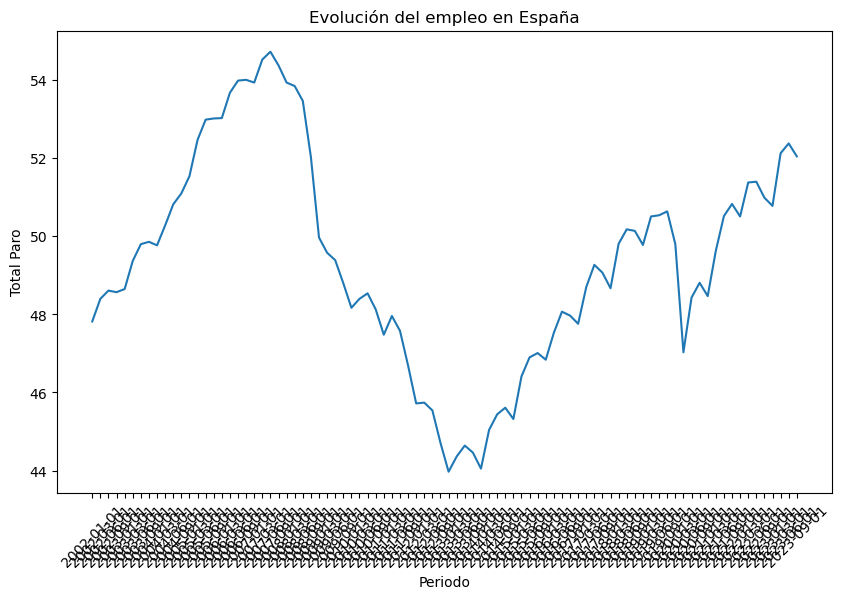

In [44]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(empl_nac['Periodo'], empl_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución del empleo en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

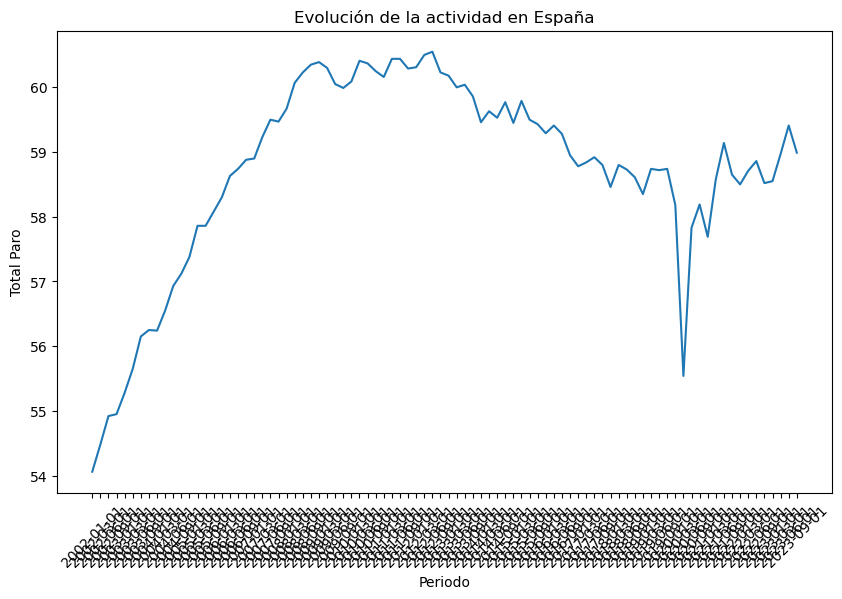

In [45]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(act_nac['Periodo'], act_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución de la actividad en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

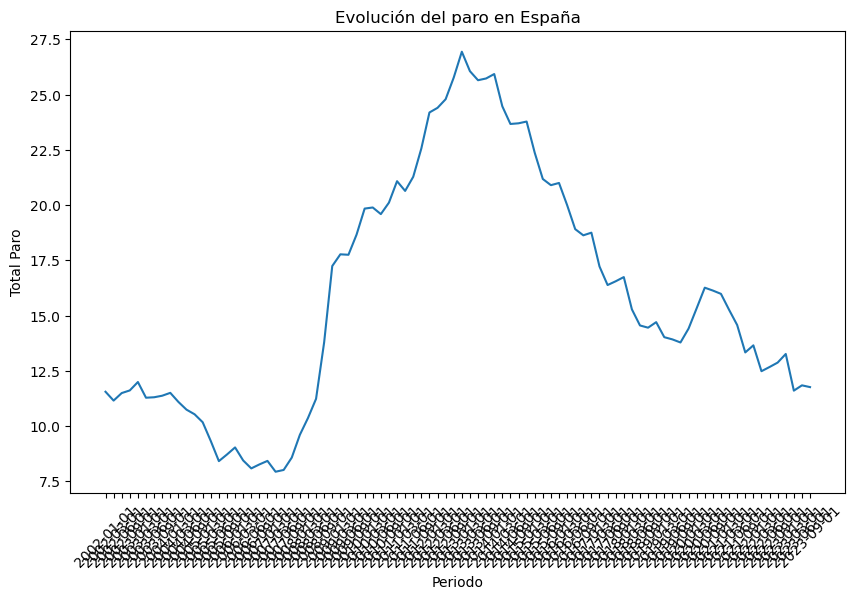

In [41]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(paro_nac['Periodo'], paro_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución del paro en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

In [46]:
pob = pd.read_csv('../data/poblacion_miles_porcentaje.csv', sep=';')

In [49]:
sal_act = pd.read_csv('../data/salario_actividad.csv', sep=';')

In [50]:
estu = pd.read_csv('../data/estudios_miles_porcentaje.csv', sep=';')

In [51]:
sal_sect = pd.read_csv('../data/ganancia_media_anual_comunidadysector.csv', sep=';')

In [55]:
sal_act

,Secciones de la CNAE 2009,Sexo,Periodo,Total
0,B_S Todas las secciones,Ambos sexos,2021,25896.82
1,B_S Todas las secciones,Ambos sexos,2020,25165.51
2,B_S Todas las secciones,Ambos sexos,2019,24395.98
3,B_S Todas las secciones,Ambos sexos,2018,24009.12
4,B_S Todas las secciones,Ambos sexos,2017,23646.50
...,...,...,...,...
793,S Otros servicios,Hombres,2012,22308.37
794,S Otros servicios,Hombres,2011,22304.83
795,S Otros servicios,Hombres,2010,21759.21
796,S Otros servicios,Hombres,2009,20085.94


In [54]:
sal_act['Total'] = sal_act['Total'].str.replace('.','')
sal_act['Total'] = sal_act['Total'].str.replace(',','.')
sal_act['Total'] = sal_act['Total'].astype(float)

In [56]:
sal_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Secciones de la CNAE 2009  798 non-null    object 
 1   Sexo                       798 non-null    object 
 2   Periodo                    798 non-null    int64  
 3   Total                      798 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 25.1+ KB
